In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

In [10]:


cfr_exps1 = np.load("./results/cfr_leduc_poker_dummy_random_br_True_2_actions_infostates_seed1_exps.npy")
cfr_infostates1 = np.load("./results/cfr_leduc_poker_dummy_random_br_True_2_actions_infostates_seed1_infostates.npy")
cfr_times1 = np.load("./results/cfr_leduc_poker_dummy_random_br_True_2_actions_infostates_seed1_times.npy")

cfr_do_exps1 = np.load("./results/cfr_psro_leduc_poker_dummy_random_br_False_2_actions_infostates_seed1_exps.npy")
cfr_do_infostates1 = np.load("./results/cfr_psro_leduc_poker_dummy_random_br_False_2_actions_infostates_seed1_infostates.npy")
cfr_do_times1 = np.load("./results/cfr_psro_leduc_poker_dummy_random_br_False_2_actions_infostates_seed1_times.npy")



xfp_times = np.load("./results/xfp_leduc_poker_dummy_iters_1000000_2_actions_seed2_times.npy")
xfp_exps = np.load("./results/xfp_leduc_poker_dummy_iters_1000000_2_actions_seed2_exps.npy")



psro_times1 = np.load("./results/psro_leduc_poker_dummy_iters_1000000_2_actions_seed1_times.npy")

psro_times2 = np.load("./results/psro_leduc_poker_dummy_random_br_Falseseed2_times.npy")
psro_times3 = np.load("./results/psro_leduc_poker_dummy_random_br_Falseseed3_times.npy")

psro_exps1 = np.load("./results/psro_leduc_poker_dummy_iters_1000000_2_actions_seed1_exps.npy")
psro_exps2 = np.load("./results/psro_leduc_poker_dummy_random_br_Falseseed2_exps.npy")
psro_exps3 = np.load("./results/psro_leduc_poker_dummy_random_br_Falseseed3_exps.npy")



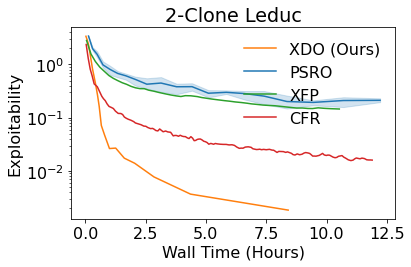

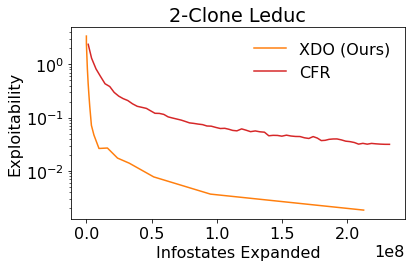

In [11]:

psro_dummy_leduc_df1 = pd.DataFrame(data=[[time/3600, exp] for time, exp in zip(psro_times1[:20], psro_exps1[:20])], columns=["time", "exploitability"])
psro_dummy_leduc_df2 = pd.DataFrame(data=[[time/3600, exp] for time, exp in zip(psro_times2[:20], psro_exps2[:20])], columns=["time", "exploitability"])
psro_dummy_leduc_df3 = pd.DataFrame(data=[[time/3600, exp] for time, exp in zip(psro_times3[:20], psro_exps3[:20])], columns=["time", "exploitability"])

psro_dummy_leduc_df = pd.concat([psro_dummy_leduc_df1, psro_dummy_leduc_df2, psro_dummy_leduc_df3])

psro_dummy_leduc_df["time"] = [interval.mid for interval in pd.qcut(psro_dummy_leduc_df["time"], len(psro_dummy_leduc_df)//3).tolist()]


plt.plot(cfr_do_times1/3600, cfr_do_exps1, label="XDO (Ours)", color="C1")

fig = sns.lineplot(y="exploitability", x="time", color="C0", data=psro_dummy_leduc_df, err_style="band", legend="brief", label="PSRO")

# plt.plot(psro_times[:20]/3600, psro_exps[:20], label="PSRO", color="C0")
plt.plot(xfp_times/3600, xfp_exps, label="XFP", color="C2")
plt.plot(cfr_times1/3600, cfr_exps1, label="CFR", color="C3")
plt.legend(frameon=False, title=None)
plt.yscale("log")
title = "2-Clone Leduc"
plt.title(title)
plt.xlabel("Wall Time (Hours)")
plt.ylabel("Exploitability")
plt.savefig(f'dummy_leduc_wall_times.png')
plt.show()

plt.plot(cfr_do_infostates1, cfr_do_exps1, label="XDO (Ours)", color="C1")
plt.plot(cfr_infostates1[:70], cfr_exps1[:70], label="CFR", color="C3")
plt.legend(frameon=False, title=None)
plt.yscale("log")
title = "2-Clone Leduc"
plt.title(title)
plt.xlabel("Infostates Expanded")
plt.ylabel("Exploitability")
plt.savefig(f'xdo_cfr_dummy_leduc.png')
plt.show()



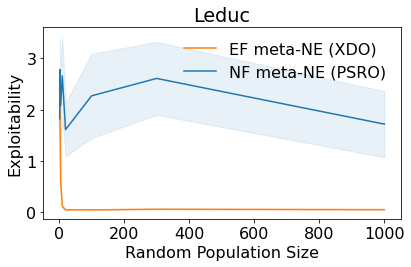

In [12]:
pop_size = [2,3,5,10,20,100,300,1000]
xdo_ci_high = [2.570368855, 1.921480742, 0.689165623, 0.1495372124, 0.04712453003, 0.04605571352, 0.06008559377, 0.05114559038]
xdo_mean = [2.411426179, 1.723403249, 0.6059137752, 0.1132545463, 0.04370012106, 0.04218304767, 0.05575177149, 0.04701388108]
xdo_ci_low = [2.252483504, 1.525325755, 0.5226619274, 0.07697188023, 0.04027571209, 0.03831038182, 0.05141794921, 0.04288217177]

psro_ci_high = [2.175895894, 3.408859698, 2.785140468, 3.43795164, 2.12763441, 3.094210243, 3.322781304, 2.36454736]
psro_mean = [1.819533552, 2.781519605, 2.07788, 2.660066627, 1.609954915, 2.270416672, 2.610508127, 1.717968615]
psro_ci_low =[1.46317121, 2.154179512, 1.370619532, 1.882181614, 1.092275421, 1.446623101, 1.898234951, 1.07138987]


p = plt.plot(pop_size, xdo_mean, label="EF meta-NE (XDO)", color="C1")
plt.fill_between(pop_size, xdo_ci_low, xdo_ci_high, color=p[-1].get_color(), alpha=.1) #std curves.

p = plt.plot(pop_size, psro_mean, label="NF meta-NE (PSRO)", color="C0")
plt.fill_between(pop_size, psro_ci_low, psro_ci_high, color=p[-1].get_color(), alpha=.1) #std curves.

plt.legend(frameon=False, title=None)
title = "Leduc"
plt.title(title)
plt.xlabel("Random Population Size")
plt.ylabel("Exploitability")
# plt.yscale("log")

plt.savefig(f'fixed_pop.png')
plt.show()

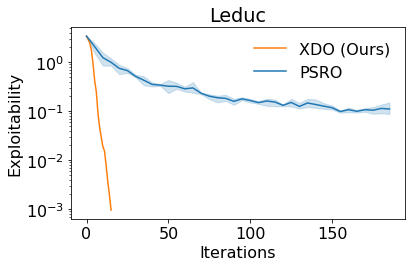

In [13]:

cdr_do_exps_leduc = np.load("./results/cfr_psro_leduc_poker_random_br_Falseseed1_exps.npy")
psro_exps_leduc_1 = np.load("./results/psro_leduc_poker_random_br_Falseseed1_exps.npy")
psro_exps_leduc_2 = np.load("./results/psro_leduc_poker_random_br_Falseseed2_exps.npy")
psro_exps_leduc_3 = np.load("./results/psro_leduc_poker_random_br_Falseseed3_exps.npy")

psro_leduc_df1 = pd.DataFrame(data=[[i*5, data] for i, data in enumerate(psro_exps_leduc_1)], columns=["iteration", "exploitability"])
psro_leduc_df2 = pd.DataFrame(data=[[i*5, data] for i, data in enumerate(psro_exps_leduc_2)], columns=["iteration", "exploitability"])
psro_leduc_df3 = pd.DataFrame(data=[[i*5, data] for i, data in enumerate(psro_exps_leduc_3)], columns=["iteration", "exploitability"])

psro_leduc_df = pd.concat([psro_leduc_df1, psro_leduc_df2, psro_leduc_df3])

plt.plot(cdr_do_exps_leduc, label="XDO (Ours)", color="C1")

fig = sns.lineplot(y="exploitability", x="iteration", color="C0", data=psro_leduc_df, err_style="band", legend="brief", label="PSRO")

# plt.plot([i*5 for i in range(psro_exps_leduc_1.shape[0])], psro_exps_leduc_1, label="PSROs", color="C0")
title = "Leduc"
plt.title(title)
plt.legend(frameon=False, title=None)
plt.yscale("log")
plt.ylabel("Exploitability")
plt.xlabel("Iterations")
plt.savefig(f'XDO_vs_PSRO_iterations.png')
plt.show()